# 2. Pre-process data

## Access data

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet

In [116]:
data_url = 'data.pkl'
df = pd.read_pickle(data_url)
df.head()

,Date,usd_aud,mean_fuel_price,Oil_price
0,2019-06-01,NaN,141.900000,NaN
1,2019-06-02,NaN,139.900000,NaN
2,2019-06-03,0.6977,134.614286,1.623
3,2019-06-04,0.6991,147.414286,1.639
4,2019-06-05,0.6970,147.671429,1.629


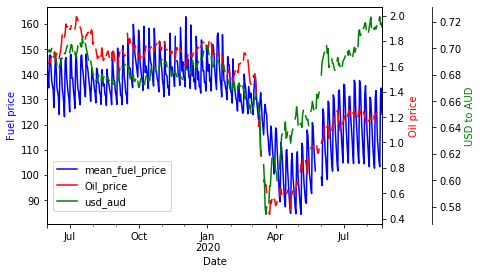

In [117]:
# Let's plot the raw data
ax = df.plot(x="Date", y="mean_fuel_price", legend=False, color="b")
ax2 = ax.twinx()
df.plot(x="Date", y="Oil_price", ax=ax2, legend=False, color="r")
ax3 = ax.twinx()
ax3.spines["right"].set_position(("axes", 1.15))
df.plot(x="Date", y="usd_aud", ax=ax3, legend=False, color="g")

ax.set_xlabel("Date")
ax.set_ylabel("Fuel price")
ax2.set_ylabel("Oil price")
ax3.set_ylabel("USD to AUD")

ax.yaxis.label.set_color(color="b")
ax2.yaxis.label.set_color(color="r")
ax3.yaxis.label.set_color(color="g")

ax.figure.legend(bbox_to_anchor=(0.11, 0.2), loc='lower left')
plt.show()

## Use fb prophet to get trends of data with seasonality removed

### Fuel price

In [118]:
# prepare data for the model
df_ph_f = df.loc[:, ['mean_fuel_price', 'Date']]
df_ph_f.rename(columns={'mean_fuel_price':'y', 'Date':'ds'}, inplace=True)

In [119]:
# fit the model
m_fuel = Prophet()
m_fuel.fit(df_ph_f)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [120]:
# make a dataframe of future dates
future_fuel = m_fuel.make_future_dataframe(periods=21)
future_fuel.tail()

,ds
464,2020-09-07
465,2020-09-08
466,2020-09-09
467,2020-09-10
468,2020-09-11


In [121]:
# create some predictons
forecast_fuel = m_fuel.predict(future_fuel)
forecast_fuel[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
464,2020-09-07,118.311763,109.245822,126.781478
465,2020-09-08,129.749260,120.976634,138.696151
466,2020-09-09,136.484733,127.521793,145.004894
467,2020-09-10,133.803973,125.433800,141.916452
468,2020-09-11,130.515603,122.338176,139.700604


In [122]:
forecast_fuel.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [140]:
forecast_fuel.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-06-01,136.128946,124.705277,141.826816,136.128946,136.128946,-2.758918,-2.758918,-2.758918,-2.758918,-2.758918,-2.758918,0.0,0.0,0.0,133.370028
1,2019-06-02,136.166923,122.403488,138.869242,136.166923,136.166923,-5.249500,-5.249500,-5.249500,-5.249500,-5.249500,-5.249500,0.0,0.0,0.0,130.917423
2,2019-06-03,136.204901,117.601691,134.579584,136.204901,136.204901,-9.466868,-9.466868,-9.466868,-9.466868,-9.466868,-9.466868,0.0,0.0,0.0,126.738033
3,2019-06-04,136.242878,130.172516,146.203893,136.242878,136.242878,1.774252,1.774252,1.774252,1.774252,1.774252,1.774252,0.0,0.0,0.0,138.017131
4,2019-06-05,136.280856,136.072978,152.627544,136.280856,136.280856,8.313350,8.313350,8.313350,8.313350,8.313350,8.313350,0.0,0.0,0.0,144.594206


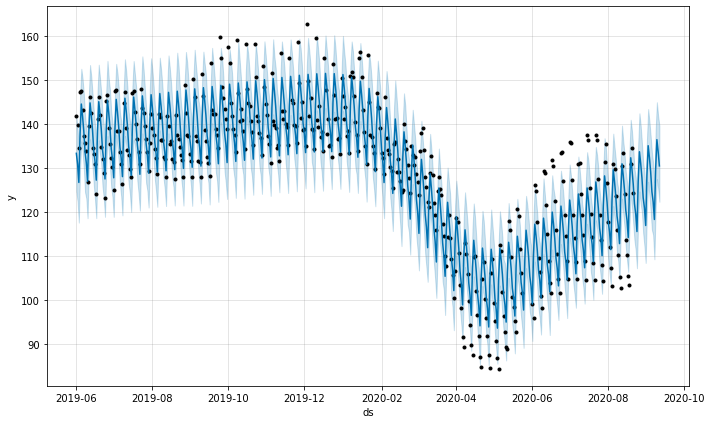

In [123]:
fig1 = m_fuel.plot(forecast_fuel)

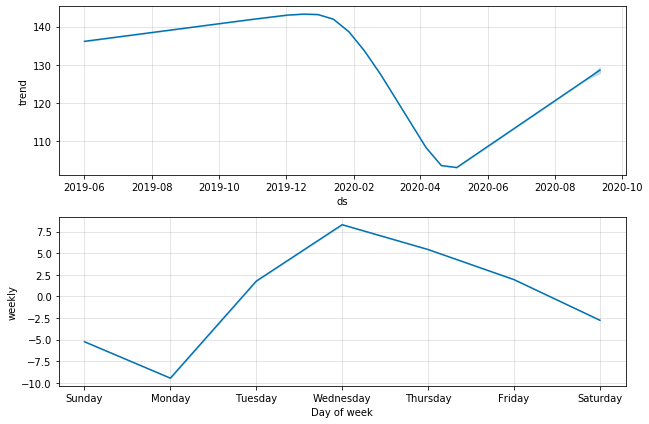

In [124]:
fig2 = m_fuel.plot_components(forecast_fuel)

### Oil price

In [125]:
# prepare data for the model
df_ph_f = df.loc[:, ['Oil_price', 'Date']]
df_ph_f.rename(columns={'Oil_price':'y', 'Date':'ds'}, inplace=True)

In [126]:
# fit the model
m_oil = Prophet()
m_oil.fit(df_ph_f)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [127]:
# make a dataframe of future dates
future_oil = m_oil.make_future_dataframe(periods=21)
future_oil.tail()

,ds
464,2020-09-07
465,2020-09-08
466,2020-09-09
467,2020-09-10
468,2020-09-11


In [128]:
# create some predictons
forecast_oil = m.predict(future_oil)
forecast_oil[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
464,2020-09-07,0.737731,0.725645,0.748855
465,2020-09-08,0.738916,0.726568,0.750808
466,2020-09-09,0.739131,0.726930,0.750318
467,2020-09-10,0.739521,0.727790,0.750931
468,2020-09-11,0.739866,0.728531,0.752218


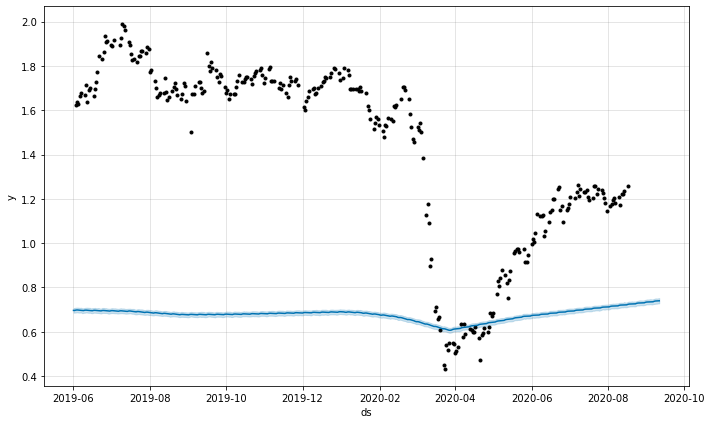

In [129]:
fig1 = m_oil.plot(forecast_oil)

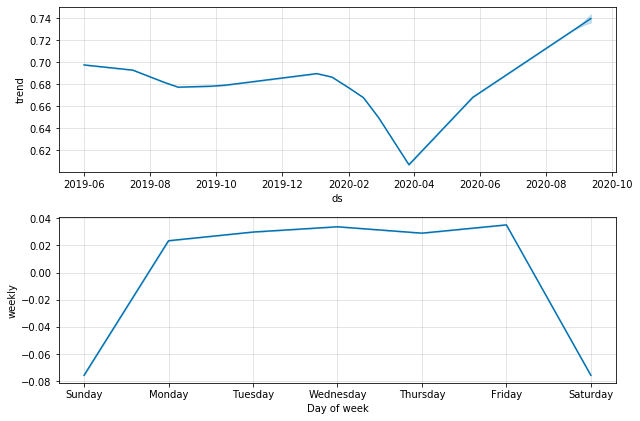

In [130]:
fig2 = m_oil.plot_components(forecast_oil)

### Exchange rate

In [131]:
# prepare data for the model
df_ph_f = df.loc[:, ['usd_aud', 'Date']]
df_ph_f.rename(columns={'usd_aud':'y', 'Date':'ds'}, inplace=True)

In [132]:
# fit the model
m = Prophet()
m.fit(df_ph_f)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [133]:
# make a dataframe of future dates
future = m.make_future_dataframe(periods=21)
future.tail()

,ds
464,2020-09-07
465,2020-09-08
466,2020-09-09
467,2020-09-10
468,2020-09-11


In [134]:
# create some predictons
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
464,2020-09-07,0.737731,0.726414,0.749923
465,2020-09-08,0.738916,0.726859,0.750811
466,2020-09-09,0.739131,0.727442,0.751151
467,2020-09-10,0.739521,0.727604,0.751254
468,2020-09-11,0.739866,0.728289,0.751516


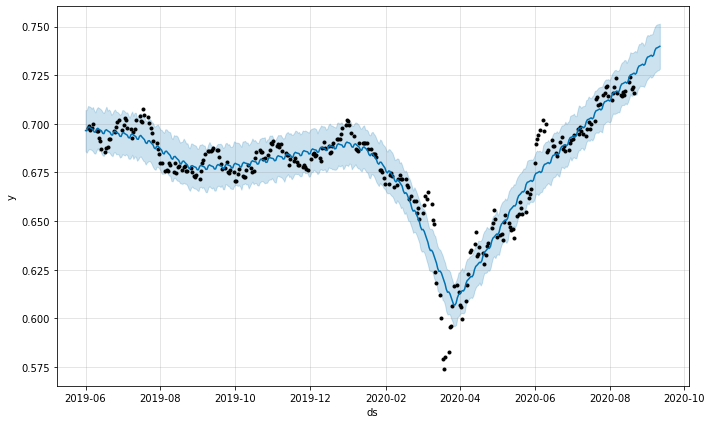

In [135]:
fig1 = m.plot(forecast)

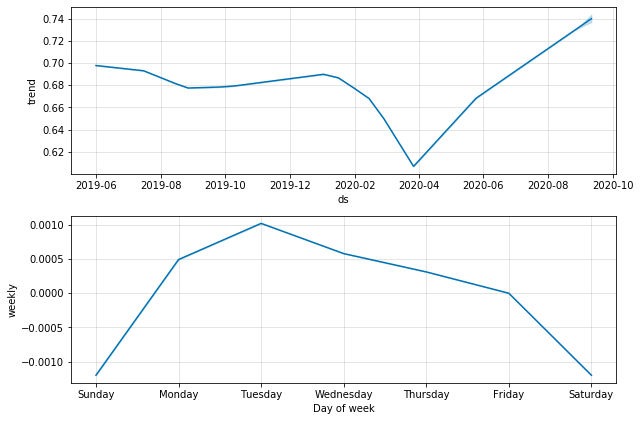

In [136]:
fig2 = m.plot_components(forecast)

## Compare trend for fuel price and oil price

In [190]:
df0 = forecast_fuel[['ds', 'trend']]
df0.rename(columns={'trend':'trend_fuel'}, inplace=True)
df1 = forecast_oil[['ds', 'trend']]
df1.rename(columns={'trend':'trend_oil'}, inplace=True)

In [191]:
# Merge with trend of oil
df = pd.merge(df0, df1, how='left', on="ds")
df.head()


,ds,trend_fuel,trend_oil
0,2019-06-01,136.128946,0.697753
1,2019-06-02,136.166923,0.697648
2,2019-06-03,136.204901,0.697544
3,2019-06-04,136.242878,0.697439
4,2019-06-05,136.280856,0.697334


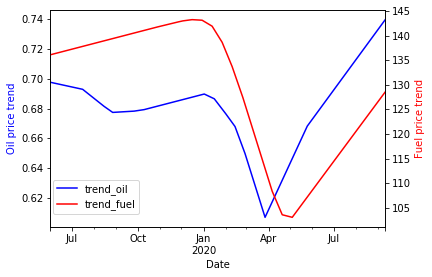

In [194]:
# Let's plot the two trends
ax = df.plot(x="ds", y="trend_oil", legend=False, color="b")
ax2 = ax.twinx()
df.plot(x="ds", y="trend_fuel", ax=ax2, legend=False, color="r")

ax.set_xlabel("Date")
ax.set_ylabel("Oil price trend")
ax2.set_ylabel("Fuel price trend")

ax.yaxis.label.set_color(color="b")
ax2.yaxis.label.set_color(color="r")

ax.figure.legend(bbox_to_anchor=(0.11, 0.2), loc='lower left')
plt.show()

In [201]:
min_oil = df[df['trend_oil'] == df['trend_oil'].min()]
min_oil

,ds,trend_fuel,trend_oil
300,2020-03-27,112.977865,0.606988


In [202]:
min_fuel = df[df['trend_fuel'] == df['trend_fuel'].min()]
min_fuel

,ds,trend_fuel,trend_oil
338,2020-05-04,103.035311,0.646468


In [211]:
min_fuel.iloc[0]['ds']

Timestamp('2020-05-04 00:00:00')

In [212]:
# Calculate the number of dats between the minimums
(min_fuel.iloc[0]['ds'] - min_oil.iloc[0]['ds']).days

38